In [1]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


JACCARD SIMILARITY

In [2]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION_GEN_1__meanJaccardIndex.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de JAccard de cada corrida para cada topico
    # en realidad como es poblacional es 1 solo valor por corrida
    #    topic         1         2       3           4      5        
    #       1      0.677144  0.802831  0.755010  0.631885  0.841196
    #       134    0.810832  0.928961  0.913061  0.908085  0.913908
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)



# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_jaccardSimilarity_evaluation_by_run_gen_1.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.677144,0.810832,0.847386,0.732702,0.592182,0.989954,0.460031,0.642377,0.578035,0.906579,...,0.463703,0.850147,0.707715,0.887338,0.722124,0.365136,0.980882,0.295396,0.787453,0.746087
2,0.802831,0.928961,0.882871,0.725702,0.679360,0.991816,0.458165,0.879257,0.809635,0.930716,...,0.451595,0.793577,0.680090,0.846006,0.649557,0.582106,0.967487,0.264144,0.307209,0.760689
3,0.755010,0.913061,0.881500,0.699978,0.742384,0.993515,0.269481,0.866368,0.926943,0.881865,...,0.567613,0.778870,0.625255,0.902286,0.716886,0.235590,0.961703,0.494388,0.678626,0.786290
4,0.631885,0.908085,0.916578,0.593053,0.834472,0.987006,0.479893,0.816605,0.870327,0.835350,...,0.632288,0.808308,0.547596,0.555063,0.704948,0.441966,0.942136,0.279148,0.841555,0.334799
5,0.841196,0.913908,0.872949,0.760246,0.814072,0.944844,0.361982,0.863436,0.761989,0.919742,...,0.440275,0.834107,0.715836,0.883859,0.663223,0.365623,0.973509,0.502351,0.155296,0.728344


In [3]:
stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.741613,0.894969,0.880257,0.702336,0.732494,0.981427,0.405911,0.813609,0.789386,0.894850,...,0.511095,0.813002,0.655298,0.814911,0.691348,0.398084,0.965143,0.367085,0.554028,0.671242
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.086661,0.047677,0.024807,0.064749,0.099578,0.020592,0.088988,0.098622,0.133513,0.037922,...,0.084681,0.029110,0.069874,0.146732,0.032870,0.126820,0.014700,0.120387,0.305201,0.189270


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.741613,5.0,0.086661
134,0.894969,5.0,0.047677
187,0.880257,5.0,0.024807
215,0.702336,5.0,0.064749
221,0.732494,5.0,0.099578
25,0.981427,5.0,0.020592
259,0.405911,5.0,0.088988
289,0.813609,5.0,0.098622
350,0.789386,5.0,0.133513
363,0.894850,5.0,0.037922


In [5]:
print(stats_all_topics['mean'].describe().transpose())


t = pd.DataFrame({  'mean_js': [stats_all_topics['mean'].mean()],                    
                    'count_js': [stats_all_topics['mean'].count()],
                    'std_js': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_js'] = ci95_lo
t['ci95_hi_js'] = ci95_hi


t.to_csv(save_path + 'co3_jaccardSimilarity_evaluation_stats_gen_1.csv')
t

count    25.000000
mean      0.724380
std       0.187477
min       0.367085
25%       0.655298
50%       0.741613
75%       0.880257
max       0.981427
Name: mean, dtype: float64


,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0.72438,25,0.187477,0.650889,0.797871


Text(0.5, 0.98, 'Jaccard Similarity  - Co3')

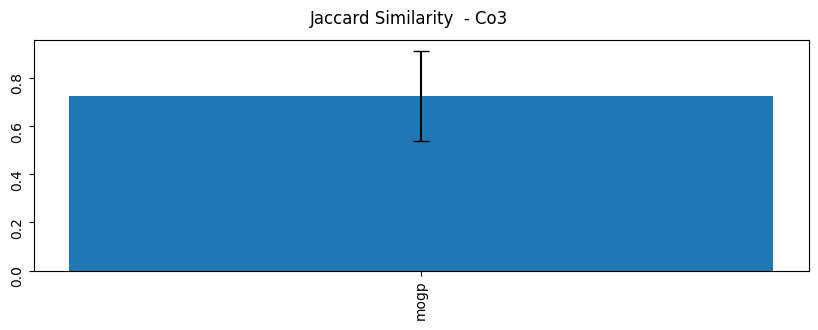

In [6]:
######### JACCARD
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_js'], yerr=t['std_js'], capsize=6)

fig.suptitle('Jaccard Similarity  - '+ comb)